# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=10000)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
pd.set_option('display.max_rows', 6000)
import numpy as np
import time

def get_df():
    df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv').sort_values(by='Date').reset_index()
    return df.reset_index()[columns]

def weather_before(df, date, invert=False):
    if invert:
        return df[df["Date"]>=date]
    return df[df["Date"]<date]

def max_of_date(df, columns, invert=False):
    if invert:
        return df.groupby("Date").min().reset_index()[columns]
    return df.groupby("Date").max().reset_index()[columns]

def month_and_day(date):
    if len(date)==5:
        return date
    return date[5:]

In [3]:
columns = ["Date","Element","Data_Value","ID"]

wdf = get_df()
wdf["Data_Value"]=wdf["Data_Value"]/10
wdf

Date Element  Data_Value           ID
0       2005-01-01    TMIN         0.0  USW00004848
1       2005-01-01    TMAX        15.0  USC00207320
2       2005-01-01    TMIN        -1.1  USC00207320
3       2005-01-01    TMIN        -4.4  USW00014833
4       2005-01-01    TMAX         3.3  USW00014833
5       2005-01-01    TMIN        -5.0  USC00203712
6       2005-01-01    TMAX        13.3  USW00004848
7       2005-01-01    TMAX         2.8  USC00205563
8       2005-01-01    TMAX         5.6  USW00014853
9       2005-01-01    TMIN        -5.6  USW00094889
10      2005-01-01    TMIN        -3.9  USW00014853
11      2005-01-01    TMIN        -1.7  USC00205050
12      2005-01-01    TMAX         5.6  USC00205050
13      2005-01-01    TMAX        12.8  USC00205822
14      2005-01-01    TMIN        -4.4  USC00205451
15      2005-01-01    TMAX         4.4  USW00094889
16      2005-01-01    TMAX        12.8  USC00205450
17      2005-01-01    TMIN        -5.0  USC00208202
18      2005-01-01    TMAX        15.0  USC00208202
19      2005-01-01    TMAX        15.6  USC00205451
20      2005-01-01    TMAX        14.4  USC00200842
21      2005-01-01    TMIN        -3.3  USC00205450
22      2005-01-01    TMIN        -3.9  USC00201502
23      2005-01-01    TMIN        -3.9  USC00208080
24      2005-01-01    TMIN        -2.8  USC00205563
25      2005-01-01    TMIN        -3.9  USC00207312
26      2005-01-01    TMAX        15.0  USC00207312
27      2005-01-01    TMAX        15.0  USC00200228
28      2005-01-01    TMIN        -3.9  USC00200228
29      2005-01-01    TMAX        15.0  USC00202308
30      2005-01-01    TMAX        14.4  USC00203712
31      2005-01-01    TMIN        -2.2  USC00200842
32      2005-01-01    TMIN        -1.7  USC00205822
33      2005-01-01    TMAX        12.2  USC00200230
34      2005-01-01    TMAX         3.3  USC00208080
35      2005-01-01    TMIN        -2.8  USC00200032
36      2005-01-01    TMAX         6.7  USC00200032
37      2005-01-01    TMIN        -1.7  USC00202308
38      2005-01-01    TMAX        15.0  USC00207308
39      2005-01-01    TMIN        -4.4  USC00207308
40      2005-01-01    TMIN        -3.9  USC00200230
41      2005-01-02    TMAX        11.7  USW00014853
42      2005-01-02    TMAX        11.1  USC00205050
43      2005-01-02    TMIN         0.6  USC00205050
44      2005-01-02    TMIN        -1.1  USC00200230
45      2005-01-02    TMAX        11.1  USC00200230
46      2005-01-02    TMAX        10.6  USW00094889
47      2005-01-02    TMIN        -0.6  USW00094889
48      2005-01-02    TMIN        -3.9  USC00200228
49      2005-01-02    TMAX        13.3  USW00004848
50      2005-01-02    TMAX        11.7  USW00014833
51      2005-01-02    TMAX        11.1  USC00201502
52      2005-01-02    TMIN        -2.2  USC00201502
53      2005-01-02    TMIN        -0.6  USW00014833
54      2005-01-02    TMIN         1.1  USW00004848
55      2005-01-02    TMAX         3.9  USC00205822
56      2005-01-02    TMIN        -2.8  USC00205451
57      2005-01-02    TMAX         1.7  USC00205451
58      2005-01-02    TMAX         3.9  USC00208202
59      2005-01-02    TMIN        -4.4  USC00208202
60      2005-01-02    TMIN        -2.8  USC00200842
61      2005-01-02    TMAX         1.7  USC00200842
62      2005-01-02    TMAX        13.3  USC00205563
63      2005-01-02    TMIN         0.0  USW00014853
64      2005-01-02    TMAX         2.2  USC00207312
65      2005-01-02    TMIN         1.1  USC00205563
66      2005-01-02    TMAX         9.4  USC00202308
67      2005-01-02    TMIN        -0.6  USC00200032
68      2005-01-02    TMIN        -1.7  USC00202308
69      2005-01-02    TMAX        12.2  USC00200032
70      2005-01-02    TMAX         1.7  USC00200228
71      2005-01-02    TMAX        12.2  USC00208080
72      2005-01-02    TMIN        -1.7  USC00203712
73      2005-01-02    TMAX        12.2  USC00205450
74      2005-01-02    TMIN        -5.6  USC00205450
75      2005-01-02    TMIN        -4.4  USC00207308
76      20

In [4]:
weather_df = weather_before(wdf, "2015-01-01")
weather_df

Date Element  Data_Value           ID
0       2005-01-01    TMIN         0.0  USW00004848
1       2005-01-01    TMAX        15.0  USC00207320
2       2005-01-01    TMIN        -1.1  USC00207320
3       2005-01-01    TMIN        -4.4  USW00014833
4       2005-01-01    TMAX         3.3  USW00014833
5       2005-01-01    TMIN        -5.0  USC00203712
6       2005-01-01    TMAX        13.3  USW00004848
7       2005-01-01    TMAX         2.8  USC00205563
8       2005-01-01    TMAX         5.6  USW00014853
9       2005-01-01    TMIN        -5.6  USW00094889
10      2005-01-01    TMIN        -3.9  USW00014853
11      2005-01-01    TMIN        -1.7  USC00205050
12      2005-01-01    TMAX         5.6  USC00205050
13      2005-01-01    TMAX        12.8  USC00205822
14      2005-01-01    TMIN        -4.4  USC00205451
15      2005-01-01    TMAX         4.4  USW00094889
16      2005-01-01    TMAX        12.8  USC00205450
17      2005-01-01    TMIN        -5.0  USC00208202
18      2005-01-01    TMAX        15.0  USC00208202
19      2005-01-01    TMAX        15.6  USC00205451
20      2005-01-01    TMAX        14.4  USC00200842
21      2005-01-01    TMIN        -3.3  USC00205450
22      2005-01-01    TMIN        -3.9  USC00201502
23      2005-01-01    TMIN        -3.9  USC00208080
24      2005-01-01    TMIN        -2.8  USC00205563
25      2005-01-01    TMIN        -3.9  USC00207312
26      2005-01-01    TMAX        15.0  USC00207312
27      2005-01-01    TMAX        15.0  USC00200228
28      2005-01-01    TMIN        -3.9  USC00200228
29      2005-01-01    TMAX        15.0  USC00202308
30      2005-01-01    TMAX        14.4  USC00203712
31      2005-01-01    TMIN        -2.2  USC00200842
32      2005-01-01    TMIN        -1.7  USC00205822
33      2005-01-01    TMAX        12.2  USC00200230
34      2005-01-01    TMAX         3.3  USC00208080
35      2005-01-01    TMIN        -2.8  USC00200032
36      2005-01-01    TMAX         6.7  USC00200032
37      2005-01-01    TMIN        -1.7  USC00202308
38      2005-01-01    TMAX        15.0  USC00207308
39      2005-01-01    TMIN        -4.4  USC00207308
40      2005-01-01    TMIN        -3.9  USC00200230
41      2005-01-02    TMAX        11.7  USW00014853
42      2005-01-02    TMAX        11.1  USC00205050
43      2005-01-02    TMIN         0.6  USC00205050
44      2005-01-02    TMIN        -1.1  USC00200230
45      2005-01-02    TMAX        11.1  USC00200230
46      2005-01-02    TMAX        10.6  USW00094889
47      2005-01-02    TMIN        -0.6  USW00094889
48      2005-01-02    TMIN        -3.9  USC00200228
49      2005-01-02    TMAX        13.3  USW00004848
50      2005-01-02    TMAX        11.7  USW00014833
51      2005-01-02    TMAX        11.1  USC00201502
52      2005-01-02    TMIN        -2.2  USC00201502
53      2005-01-02    TMIN        -0.6  USW00014833
54      2005-01-02    TMIN         1.1  USW00004848
55      2005-01-02    TMAX         3.9  USC00205822
56      2005-01-02    TMIN        -2.8  USC00205451
57      2005-01-02    TMAX         1.7  USC00205451
58      2005-01-02    TMAX         3.9  USC00208202
59      2005-01-02    TMIN        -4.4  USC00208202
60      2005-01-02    TMIN        -2.8  USC00200842
61      2005-01-02    TMAX         1.7  USC00200842
62      2005-01-02    TMAX        13.3  USC00205563
63      2005-01-02    TMIN         0.0  USW00014853
64      2005-01-02    TMAX         2.2  USC00207312
65      2005-01-02    TMIN         1.1  USC00205563
66      2005-01-02    TMAX         9.4  USC00202308
67      2005-01-02    TMIN        -0.6  USC00200032
68      2005-01-02    TMIN        -1.7  USC00202308
69      2005-01-02    TMAX        12.2  USC00200032
70      2005-01-02    TMAX         1.7  USC00200228
71      2005-01-02    TMAX        12.2  USC00208080
72      2005-01-02    TMIN        -1.7  USC00203712
73      2005-01-02    TMAX        12.2  USC00205450
74      2005-01-02    TMIN        -5.6  USC00205450
75      2005-01-02    TMIN        -4.4  USC00207308
76      20

In [5]:
wdf_2015 = weather_before(wdf, "2015-01-01", invert=True)
wdf_2015

Date Element  Data_Value           ID
151328  2015-01-01    TMIN        -8.8  USW00014833
151329  2015-01-01    TMAX        -6.7  USC00208972
151330  2015-01-01    TMIN       -10.6  USC00202308
151331  2015-01-01    TMAX        -5.0  USC00200228
151332  2015-01-01    TMIN        -8.9  USC00200228
151333  2015-01-01    TMIN       -10.6  USC00208972
151334  2015-01-01    TMAX        -5.0  USC00202308
151335  2015-01-01    TMAX         1.1  USW00014853
151336  2015-01-01    TMIN        -7.1  USW00014853
151337  2015-01-01    TMAX        -2.1  USW00014833
151338  2015-01-01    TMAX        -6.7  USC00201502
151339  2015-01-01    TMAX        -4.4  USC00207308
151340  2015-01-01    TMIN        -8.9  USC00201250
151341  2015-01-01    TMIN        -9.4  USC00200230
151342  2015-01-01    TMAX        -5.0  USC00208080
151343  2015-01-01    TMAX        -1.1  USC00200230
151344  2015-01-01    TMIN        -8.8  USW00094889
151345  2015-01-01    TMIN       -10.6  USC00207308
151346  2015-01-01    TMIN        -8.9  USC00205822
151347  2015-01-01    TMAX        -1.1  USC00200032
151348  2015-01-01    TMIN        -9.4  USC00200032
151349  2015-01-01    TMIN        -8.2  USW00004848
151350  2015-01-01    TMAX        -0.5  USW00004848
151351  2015-01-01    TMAX        -4.4  USC00205822
151352  2015-01-01    TMAX        -0.5  USW00094889
151353  2015-01-01    TMIN       -10.6  USC00203712
151354  2015-01-01    TMAX        -5.0  USC00203712
151355  2015-01-01    TMIN       -10.0  USC00201502
151356  2015-01-01    TMAX        -5.0  USC00205451
151357  2015-01-01    TMIN       -13.3  USC00208080
151358  2015-01-01    TMIN       -11.7  USC00208202
151359  2015-01-01    TMAX        -5.6  USC00208202
151360  2015-01-01    TMAX         0.0  USC00207312
151361  2015-01-01    TMIN       -11.1  USC00207312
151362  2015-01-01    TMAX        -0.6  USC00201250
151363  2015-01-01    TMIN       -10.6  USC00205451
151364  2015-01-02    TMAX         0.0  USC00208080
151365  2015-01-02    TMIN       -11.1  USC00208202
151366  2015-01-02    TMAX        -1.7  USC00208972
151367  2015-01-02    TMIN        -4.3  USW00014833
151368  2015-01-02    TMIN        -7.2  USC00205822
151369  2015-01-02    TMAX        -0.6  USC00205822
151370  2015-01-02    TMAX        -0.6  USC00200228
151371  2015-01-02    TMIN        -8.3  USC00200228
151372  2015-01-02    TMAX         1.1  USW00014833
151373  2015-01-02    TMIN        -8.9  USC00205451
151374  2015-01-02    TMAX         0.6  USC00203712
151375  2015-01-02    TMAX        -0.6  USC00205451
151376  2015-01-02    TMAX        -1.7  USC00205050
151377  2015-01-02    TMIN        -3.2  USW00014853
151378  2015-01-02    TMAX         3.9  USW00014853
151379  2015-01-02    TMIN        -3.9  USC00201250
151380  2015-01-02    TMIN        -8.9  USC00202308
151381  2015-01-02    TMAX        -0.6  USC00202308
151382  2015-01-02    TMAX         2.2  USC00201250
151383  2015-01-02    TMAX         1.1  USC00200230
151384  2015-01-02    TMIN        -8.9  USC00205050
151385  2015-01-02    TMAX        -1.1  USC00208202
151386  2015-01-02    TMIN        -8.3  USC00208972
151387  2015-01-02    TMIN        -2.8  USC00200230
151388  2015-01-02    TMAX         1.7  USC00200032
151389  2015-01-02    TMIN        -3.3  USC00200032
151390  2015-01-02    TMIN       -12.2  USC00208080
151391  2015-01-02    TMIN        -8.3  USC00201502
151392  2015-01-02    TMAX        -2.2  USC00201502
151393  2015-01-02    TMAX         2.2  USW00004848
151394  2015-01-02    TMAX        -0.6  USC00205563
151395  2015-01-02    TMAX         0.0  USC00207308
151396  2015-01-02    TMIN       -10.6  USC00207308
151397  2015-01-02    TMIN        -6.6  USW00094889
151398  2015-01-02    TMAX         2.2  USW00094889
151399  2015-01-02    TMIN        -3.9  USC00205563
151400  2015-01-02    TMIN        -4.9  USW00004848
151401  2015-01-03    TMIN        -4.4  USC00200230
151402  2015-01-03    TMAX         0.6  USW00014833
151403  2015-01-03    TMIN        -3.9  USC00201250
151404  20

In [6]:
wdf_max = weather_df[weather_df["Element"]=="TMAX"]
wdf_min = weather_df[weather_df["Element"]=="TMIN"]
wdf_max_2015 = wdf_2015[wdf_2015["Element"]=="TMAX"]
wdf_min_2015 = wdf_2015[wdf_2015["Element"]=="TMIN"]

print(wdf_min_2015.shape)
wdf_min

(6837, 4)


Date Element  Data_Value           ID
0       2005-01-01    TMIN         0.0  USW00004848
2       2005-01-01    TMIN        -1.1  USC00207320
3       2005-01-01    TMIN        -4.4  USW00014833
5       2005-01-01    TMIN        -5.0  USC00203712
9       2005-01-01    TMIN        -5.6  USW00094889
10      2005-01-01    TMIN        -3.9  USW00014853
11      2005-01-01    TMIN        -1.7  USC00205050
14      2005-01-01    TMIN        -4.4  USC00205451
17      2005-01-01    TMIN        -5.0  USC00208202
21      2005-01-01    TMIN        -3.3  USC00205450
22      2005-01-01    TMIN        -3.9  USC00201502
23      2005-01-01    TMIN        -3.9  USC00208080
24      2005-01-01    TMIN        -2.8  USC00205563
25      2005-01-01    TMIN        -3.9  USC00207312
28      2005-01-01    TMIN        -3.9  USC00200228
31      2005-01-01    TMIN        -2.2  USC00200842
32      2005-01-01    TMIN        -1.7  USC00205822
35      2005-01-01    TMIN        -2.8  USC00200032
37      2005-01-01    TMIN        -1.7  USC00202308
39      2005-01-01    TMIN        -4.4  USC00207308
40      2005-01-01    TMIN        -3.9  USC00200230
43      2005-01-02    TMIN         0.6  USC00205050
44      2005-01-02    TMIN        -1.1  USC00200230
47      2005-01-02    TMIN        -0.6  USW00094889
48      2005-01-02    TMIN        -3.9  USC00200228
52      2005-01-02    TMIN        -2.2  USC00201502
53      2005-01-02    TMIN        -0.6  USW00014833
54      2005-01-02    TMIN         1.1  USW00004848
56      2005-01-02    TMIN        -2.8  USC00205451
59      2005-01-02    TMIN        -4.4  USC00208202
60      2005-01-02    TMIN        -2.8  USC00200842
63      2005-01-02    TMIN         0.0  USW00014853
65      2005-01-02    TMIN         1.1  USC00205563
67      2005-01-02    TMIN        -0.6  USC00200032
68      2005-01-02    TMIN        -1.7  USC00202308
72      2005-01-02    TMIN        -1.7  USC00203712
74      2005-01-02    TMIN        -5.6  USC00205450
75      2005-01-02    TMIN        -4.4  USC00207308
77      2005-01-02    TMIN         0.6  USC00208080
78      2005-01-02    TMIN        -2.2  USC00207312
81      2005-01-03    TMIN         1.7  USC00205450
85      2005-01-03    TMIN         0.6  USC00201502
87      2005-01-03    TMIN         0.6  USC00205050
88      2005-01-03    TMIN         0.6  USC00200230
91      2005-01-03    TMIN         0.0  USC00208080
92      2005-01-03    TMIN         0.6  USW00094889
95      2005-01-03    TMIN         1.1  USC00205822
97      2005-01-03    TMIN         1.1  USC00200228
98      2005-01-03    TMIN         0.0  USW00014833
100     2005-01-03    TMIN         2.2  USC00202308
102     2005-01-03    TMIN         1.7  USW00004848
104     2005-01-03    TMIN         0.6  USC00205563
105     2005-01-03    TMIN         1.1  USC00200842
110     2005-01-03    TMIN         1.1  USW00014853
111     2005-01-03    TMIN         0.6  USC00207312
112     2005-01-03    TMIN         1.1  USC00200032
115     2005-01-03    TMIN         1.7  USC00207320
116     2005-01-03    TMIN         0.0  USC00208202
118     2005-01-03    TMIN         0.6  USC00207308
119     2005-01-03    TMIN         0.0  USC00203712
121     2005-01-03    TMIN         0.6  USC00205451
122     2005-01-04    TMIN         0.6  USC00200032
125     2005-01-04    TMIN        -1.7  USC00205450
126     2005-01-04    TMIN         0.0  USW00014853
127     2005-01-04    TMIN        -0.6  USC00203712
131     2005-01-04    TMIN         0.6  USC00200228
133     2005-01-04    TMIN         0.0  USC00205451
135     2005-01-04    TMIN        -3.9  USC00208080
136     2005-01-04    TMIN        -3.3  USC00205050
137     2005-01-04    TMIN         1.7  USC00202308
141     2005-01-04    TMIN         1.1  USC00200842
142     2005-01-04    TMIN        -0.6  USW00014833
146     2005-01-04    TMIN         0.0  USW00004848
147     2005-01-04    TMIN         0.6  USC00207312
148     2005-01-04    TMIN         0.0  USC00201502
149     2005-01-04    TMIN        -3.9  USC00205563
152     20

In [7]:
columns = ["Date","Element","Data_Value"]
wdf_min = max_of_date(wdf_min, columns, invert=True)
wdf_max = max_of_date(wdf_max, columns)
wdf_min_2015 = max_of_date(wdf_min_2015, columns, invert=True)
wdf_max_2015 = max_of_date(wdf_max_2015, columns)

print(wdf_min_2015.shape)
wdf_min

(365, 3)


Date Element  Data_Value
0     2005-01-01    TMIN        -5.6
1     2005-01-02    TMIN        -5.6
2     2005-01-03    TMIN         0.0
3     2005-01-04    TMIN        -3.9
4     2005-01-05    TMIN        -9.4
5     2005-01-06    TMIN       -10.6
6     2005-01-07    TMIN       -11.1
7     2005-01-08    TMIN       -10.0
8     2005-01-09    TMIN        -6.7
9     2005-01-10    TMIN        -5.6
10    2005-01-11    TMIN        -2.2
11    2005-01-12    TMIN        -1.7
12    2005-01-13    TMIN        -8.3
13    2005-01-14    TMIN       -12.8
14    2005-01-15    TMIN       -14.4
15    2005-01-16    TMIN       -15.0
16    2005-01-17    TMIN       -18.9
17    2005-01-18    TMIN       -21.7
18    2005-01-19    TMIN       -30.0
19    2005-01-20    TMIN       -15.6
20    2005-01-21    TMIN       -17.8
21    2005-01-22    TMIN       -17.8
22    2005-01-23    TMIN       -25.0
23    2005-01-24    TMIN       -26.7
24    2005-01-25    TMIN       -22.8
25    2005-01-26    TMIN       -20.6
26    2005-01-27    TMIN       -23.9
27    2005-01-28    TMIN       -25.0
28    2005-01-29    TMIN       -22.2
29    2005-01-30    TMIN       -21.7
30    2005-01-31    TMIN       -16.7
31    2005-02-01    TMIN       -21.1
32    2005-02-02    TMIN       -16.7
33    2005-02-03    TMIN       -16.7
34    2005-02-04    TMIN       -15.6
35    2005-02-05    TMIN       -12.8
36    2005-02-06    TMIN        -8.9
37    2005-02-07    TMIN        -5.6
38    2005-02-08    TMIN        -3.3
39    2005-02-09    TMIN        -7.8
40    2005-02-10    TMIN       -11.1
41    2005-02-11    TMIN       -12.2
42    2005-02-12    TMIN        -8.3
43    2005-02-13    TMIN        -5.6
44    2005-02-14    TMIN        -2.8
45    2005-02-15    TMIN        -1.1
46    2005-02-16    TMIN        -8.3
47    2005-02-17    TMIN       -13.3
48    2005-02-18    TMIN       -15.0
49    2005-02-19    TMIN       -13.9
50    2005-02-20    TMIN        -8.9
51    2005-02-21    TMIN        -8.9
52    2005-02-22    TMIN        -7.8
53    2005-02-23    TMIN       -12.2
54    2005-02-24    TMIN       -12.8
55    2005-02-25    TMIN       -12.8
56    2005-02-26    TMIN       -14.4
57    2005-02-27    TMIN       -16.1
58    2005-02-28    TMIN       -10.0
59    2005-03-01    TMIN       -11.7
60    2005-03-02    TMIN       -17.2
61    2005-03-03    TMIN       -21.1
62    2005-03-04    TMIN       -17.8
63    2005-03-05    TMIN       -15.0
64    2005-03-06    TMIN       -11.1
65    2005-03-07    TMIN       -14.4
66    2005-03-08    TMIN       -12.2
67    2005-03-09    TMIN       -14.4
68    2005-03-10    TMIN       -15.6
69    2005-03-11    TMIN       -10.0
70    2005-03-12    TMIN       -12.2
71    2005-03-13    TMIN       -14.4
72    2005-03-14    TMIN       -16.1
73    2005-03-15    TMIN       -10.6
74    2005-03-16    TMIN       -12.2
75    2005-03-17    TMIN       -12.8
76    2005-03-18    TMIN       -10.0
77    2005-03-19    TMIN        -8.9
78    2005-03-20    TMIN        -3.3
79    2005-03-21    TMIN        -2.2
80    2005-03-22    TMIN        -6.1
81    2005-03-23    TMIN        -5.0
82    2005-03-24    TMIN        -5.0
83    2005-03-25    TMIN        -3.3
84    2005-03-26    TMIN        -6.1
85    2005-03-27    TMIN        -4.4
86    2005-03-28    TMIN        -2.2
87    2005-03-29    TMIN        -3.3
88    2005-03-30    TMIN        -2.8
89    2005-03-31    TMIN        -1.1
90    2005-04-01    TMIN        -2.2
91    2005-04-02    TMIN        -6.7
92    2005-04-03    TMIN        -0.6
93    2005-04-04    TMIN        -3.9
94    2005-04-05    TMIN         1.1
95    2005-04-06    TMIN        -1.1
96    2005-04-07    TMIN        -0.6
97    2005-04-08    TMIN        -2.2
98    2005-04-09    TMIN        -1.7
99    2005-04-10    TMIN         0.6
100   2005-04-11    TMIN         1.7
101   2005-04-12    TMIN         1.7
102   2005-04-13    TMIN         0.0
103   2005-04-14    TMIN        -2.8
104   2005-04-15    TMIN        -2.2
105   2005-04-16    TMIN        -1.7
106   2005-04-17    TMIN         0.6
107   2005-04-18

In [8]:
wdf_max["Date"] = wdf_max["Date"].apply(month_and_day)
wdf_min["Date"] = wdf_min["Date"].apply(month_and_day)
wdf_min_2015["Date"] = wdf_min_2015["Date"].apply(month_and_day)
wdf_max_2015["Date"] = wdf_max_2015["Date"].apply(month_and_day)

print(wdf_max_2015.shape)
wdf_max

(365, 3)


Date Element  Data_Value
0     01-01    TMAX        15.6
1     01-02    TMAX        13.9
2     01-03    TMAX        13.3
3     01-04    TMAX         3.9
4     01-05    TMAX         3.3
5     01-06    TMAX         0.0
6     01-07    TMAX         0.6
7     01-08    TMAX         1.7
8     01-09    TMAX         2.8
9     01-10    TMAX         4.4
10    01-11    TMAX         4.4
11    01-12    TMAX        13.9
12    01-13    TMAX        16.1
13    01-14    TMAX        15.0
14    01-15    TMAX        -3.3
15    01-16    TMAX        -3.3
16    01-17    TMAX        -5.0
17    01-18    TMAX        -3.3
18    01-19    TMAX         1.1
19    01-20    TMAX         1.1
20    01-21    TMAX        -3.9
21    01-22    TMAX        -7.2
22    01-23    TMAX        -4.4
23    01-24    TMAX         1.1
24    01-25    TMAX         2.8
25    01-26    TMAX         2.8
26    01-27    TMAX         0.6
27    01-28    TMAX        -1.1
28    01-29    TMAX         1.7
29    01-30    TMAX         2.8
30    01-31    TMAX         3.3
31    02-01    TMAX         1.7
32    02-02    TMAX         1.7
33    02-03    TMAX         6.1
34    02-04    TMAX         6.7
35    02-05    TMAX         8.9
36    02-06    TMAX         7.8
37    02-07    TMAX         6.7
38    02-08    TMAX         6.7
39    02-09    TMAX         3.9
40    02-10    TMAX         0.6
41    02-11    TMAX         3.3
42    02-12    TMAX        10.0
43    02-13    TMAX         9.4
44    02-14    TMAX         9.4
45    02-15    TMAX        11.7
46    02-16    TMAX        10.0
47    02-17    TMAX         5.0
48    02-18    TMAX        -1.7
49    02-19    TMAX         2.2
50    02-20    TMAX         2.8
51    02-21    TMAX         6.1
52    02-22    TMAX         3.9
53    02-23    TMAX         3.9
54    02-24    TMAX         2.8
55    02-25    TMAX         1.1
56    02-26    TMAX         2.2
57    02-27    TMAX         1.1
58    02-28    TMAX         4.4
59    03-01    TMAX         3.9
60    03-02    TMAX        -1.1
61    03-03    TMAX         1.7
62    03-04    TMAX         4.4
63    03-05    TMAX         7.8
64    03-06    TMAX        19.4
65    03-07    TMAX        13.9
66    03-08    TMAX        13.9
67    03-09    TMAX        -0.6
68    03-10    TMAX         6.1
69    03-11    TMAX         3.3
70    03-12    TMAX         2.8
71    03-13    TMAX         3.9
72    03-14    TMAX         3.9
73    03-15    TMAX         5.6
74    03-16    TMAX         7.8
75    03-17    TMAX         6.7
76    03-18    TMAX         5.0
77    03-19    TMAX        11.7
78    03-20    TMAX         5.0
79    03-21    TMAX         5.6
80    03-22    TMAX         9.4
81    03-23    TMAX         9.4
82    03-24    TMAX        10.6
83    03-25    TMAX        10.0
84    03-26    TMAX         8.9
85    03-27    TMAX        13.9
86    03-28    TMAX        16.7
87    03-29    TMAX        18.3
88    03-30    TMAX        23.9
89    03-31    TMAX        23.3
90    04-01    TMAX        20.0
91    04-02    TMAX        13.3
92    04-03    TMAX        15.6
93    04-04    TMAX        20.0
94    04-05    TMAX        25.6
95    04-06    TMAX        27.2
96    04-07    TMAX        26.7
97    04-08    TMAX        18.9
98    04-09    TMAX        20.0
99    04-10    TMAX        23.3
100   04-11    TMAX        22.8
101   04-12    TMAX        18.3
102   04-13    TMAX        17.2
103   04-14    TMAX        20.6
104   04-15    TMAX        20.6
105   04-16    TMAX        24.4
106   04-17    TMAX        24.4
107   04-18    TMAX        27.2
108   04-19    TMAX        28.9
109   04-20    TMAX        28.9
110   04-21    TMAX        25.0
111   04-22    TMAX        15.6
112   04-23    TMAX        11.1
113   04-24    TMAX        15.6
114   04-25    TMAX        17.8
115   04-26    TMAX        16.7
116   04-27    TMAX        15.6
117   04-28    TMAX        15.6
118   04-29    TMAX        14.4
119   04-30    TMAX        14.4
120   05-01    TMAX        15.6
121   05-02    TMAX        14.4
122   05-03    TMAX        12.2
123   05-04    TMAX        16.7
124   0

In [9]:
wdf_max = max_of_date(wdf_max, columns)
wdf_min = max_of_date(wdf_min, columns, invert=True)
wdf_max_2015 = max_of_date(wdf_max_2015, columns)
wdf_min_2015 = max_of_date(wdf_min_2015, columns, invert=True)

print(wdf_max_2015.shape)
wdf_max

(365, 3)


Date Element  Data_Value
0    01-01    TMAX        15.6
1    01-02    TMAX        13.9
2    01-03    TMAX        13.3
3    01-04    TMAX        10.6
4    01-05    TMAX        12.8
5    01-06    TMAX        18.9
6    01-07    TMAX        21.7
7    01-08    TMAX        19.4
8    01-09    TMAX        17.8
9    01-10    TMAX        10.0
10   01-11    TMAX        15.6
11   01-12    TMAX        16.1
12   01-13    TMAX        16.7
13   01-14    TMAX        15.0
14   01-15    TMAX         6.7
15   01-16    TMAX         9.4
16   01-17    TMAX        13.3
17   01-18    TMAX        12.2
18   01-19    TMAX        10.6
19   01-20    TMAX        13.3
20   01-21    TMAX        13.3
21   01-22    TMAX        11.7
22   01-23    TMAX        12.8
23   01-24    TMAX        11.7
24   01-25    TMAX        10.0
25   01-26    TMAX         8.9
26   01-27    TMAX         7.8
27   01-28    TMAX        12.2
28   01-29    TMAX        17.8
29   01-30    TMAX        18.3
30   01-31    TMAX        14.4
31   02-01    TMAX        15.0
32   02-02    TMAX        10.6
33   02-03    TMAX         8.9
34   02-04    TMAX        11.7
35   02-05    TMAX        12.2
36   02-06    TMAX        11.7
37   02-07    TMAX        11.7
38   02-08    TMAX        12.8
39   02-09    TMAX         7.8
40   02-10    TMAX        16.1
41   02-11    TMAX        16.1
42   02-12    TMAX        19.4
43   02-13    TMAX         9.4
44   02-14    TMAX        10.6
45   02-15    TMAX        11.7
46   02-16    TMAX        14.4
47   02-17    TMAX        15.6
48   02-18    TMAX        14.4
49   02-19    TMAX        12.8
50   02-20    TMAX        10.6
51   02-21    TMAX        10.0
52   02-22    TMAX        10.6
53   02-23    TMAX        12.2
54   02-24    TMAX        11.1
55   02-25    TMAX         9.4
56   02-26    TMAX        11.1
57   02-27    TMAX        12.2
58   02-28    TMAX        11.7
59   02-29    TMAX        16.7
60   03-01    TMAX        11.7
61   03-02    TMAX        15.6
62   03-03    TMAX        16.1
63   03-04    TMAX        15.6
64   03-05    TMAX        15.6
65   03-06    TMAX        20.6
66   03-07    TMAX        21.1
67   03-08    TMAX        20.0
68   03-09    TMAX        18.9
69   03-10    TMAX        18.9
70   03-11    TMAX        20.0
71   03-12    TMAX        20.6
72   03-13    TMAX        22.8
73   03-14    TMAX        26.7
74   03-15    TMAX        26.7
75   03-16    TMAX        26.1
76   03-17    TMAX        26.1
77   03-18    TMAX        25.0
78   03-19    TMAX        26.7
79   03-20    TMAX        30.0
80   03-21    TMAX        30.6
81   03-22    TMAX        31.7
82   03-23    TMAX        30.6
83   03-24    TMAX        28.3
84   03-25    TMAX        23.3
85   03-26    TMAX        27.2
86   03-27    TMAX        26.7
87   03-28    TMAX        27.2
88   03-29    TMAX        22.2
89   03-30    TMAX        23.9
90   03-31    TMAX        23.3
91   04-01    TMAX        27.2
92   04-02    TMAX        27.8
93   04-03    TMAX        27.2
94   04-04    TMAX        25.6
95   04-05    TMAX        25.6
96   04-06    TMAX        28.3
97   04-07    TMAX        27.8
98   04-08    TMAX        22.8
99   04-09    TMAX        21.7
100  04-10    TMAX        30.0
101  04-11    TMAX        28.9
102  04-12    TMAX        24.4
103  04-13    TMAX        27.2
104  04-14    TMAX        27.8
105  04-15    TMAX        28.9
106  04-16    TMAX        28.9
107  04-17    TMAX        24.4
108  04-18    TMAX        28.3
109  04-19    TMAX        28.9
110  04-20    TMAX        28.9
111  04-21    TMAX        27.8
112  04-22    TMAX        27.2
113  04-23    TMAX        27.8
114  04-24    TMAX        30.0
115  04-25    TMAX        30.6
116  04-26    TMAX        29.4
117  04-27    TMAX        29.4
118  04-28    TMAX        29.4
119  04-29    TMAX        27.2
120  04-30    TMAX        27.8
121  05-01    TMAX        28.3
122  05-02    TMAX        30.6
123  05-03    TMAX        33.3
124  05-04    TMAX        32.2
125  05-05    TMAX        27.8
126  05-06    TMAX        28.3
127  05-07    TMAX        25.6
128  05

In [10]:
dates = pd.date_range(start='2015-1-1', end='2015-12-31', freq='D')
dates


DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [11]:
wdf_max = wdf_max[wdf_max["Date"]!="02-29"]
wdf_min = wdf_min[wdf_min["Date"]!="02-29"]
wdf_min

Date Element  Data_Value
0    01-01    TMIN       -16.0
1    01-02    TMIN       -26.7
2    01-03    TMIN       -26.7
3    01-04    TMIN       -26.1
4    01-05    TMIN       -15.0
5    01-06    TMIN       -26.6
6    01-07    TMIN       -30.6
7    01-08    TMIN       -29.4
8    01-09    TMIN       -27.8
9    01-10    TMIN       -25.6
10   01-11    TMIN       -18.3
11   01-12    TMIN       -19.3
12   01-13    TMIN       -25.0
13   01-14    TMIN       -26.6
14   01-15    TMIN       -27.2
15   01-16    TMIN       -29.4
16   01-17    TMIN       -29.4
17   01-18    TMIN       -28.9
18   01-19    TMIN       -30.0
19   01-20    TMIN       -23.9
20   01-21    TMIN       -26.0
21   01-22    TMIN       -27.7
22   01-23    TMIN       -25.0
23   01-24    TMIN       -26.7
24   01-25    TMIN       -24.3
25   01-26    TMIN       -23.8
26   01-27    TMIN       -23.9
27   01-28    TMIN       -29.4
28   01-29    TMIN       -27.8
29   01-30    TMIN       -23.3
30   01-31    TMIN       -19.4
31   02-01    TMIN       -21.1
32   02-02    TMIN       -21.1
33   02-03    TMIN       -23.2
34   02-04    TMIN       -26.1
35   02-05    TMIN       -28.2
36   02-06    TMIN       -26.1
37   02-07    TMIN       -23.3
38   02-08    TMIN       -22.8
39   02-09    TMIN       -21.0
40   02-10    TMIN       -25.6
41   02-11    TMIN       -25.5
42   02-12    TMIN       -28.8
43   02-13    TMIN       -27.2
44   02-14    TMIN       -21.7
45   02-15    TMIN       -25.6
46   02-16    TMIN       -22.2
47   02-17    TMIN       -24.3
48   02-18    TMIN       -22.2
49   02-19    TMIN       -18.8
50   02-20    TMIN       -17.8
51   02-21    TMIN       -17.8
52   02-22    TMIN       -17.2
53   02-23    TMIN       -22.8
54   02-24    TMIN       -21.1
55   02-25    TMIN       -17.2
56   02-26    TMIN       -20.0
57   02-27    TMIN       -23.8
58   02-28    TMIN       -27.1
60   03-01    TMIN       -26.7
61   03-02    TMIN       -18.2
62   03-03    TMIN       -24.4
63   03-04    TMIN       -23.9
64   03-05    TMIN       -18.9
65   03-06    TMIN       -17.8
66   03-07    TMIN       -17.8
67   03-08    TMIN       -16.7
68   03-09    TMIN       -14.4
69   03-10    TMIN       -15.6
70   03-11    TMIN       -12.2
71   03-12    TMIN       -14.4
72   03-13    TMIN       -22.2
73   03-14    TMIN       -20.6
74   03-15    TMIN       -10.6
75   03-16    TMIN       -13.9
76   03-17    TMIN       -17.8
77   03-18    TMIN       -16.1
78   03-19    TMIN       -10.0
79   03-20    TMIN       -10.6
80   03-21    TMIN       -13.3
81   03-22    TMIN       -12.2
82   03-23    TMIN       -13.3
83   03-24    TMIN       -15.0
84   03-25    TMIN       -13.9
85   03-26    TMIN       -15.6
86   03-27    TMIN       -15.6
87   03-28    TMIN       -10.6
88   03-29    TMIN       -10.0
89   03-30    TMIN        -9.4
90   03-31    TMIN        -8.3
91   04-01    TMIN        -8.3
92   04-02    TMIN        -7.8
93   04-03    TMIN        -8.9
94   04-04    TMIN        -8.3
95   04-05    TMIN        -7.2
96   04-06    TMIN        -9.4
97   04-07    TMIN        -8.3
98   04-08    TMIN        -8.9
99   04-09    TMIN        -6.7
100  04-10    TMIN        -8.3
101  04-11    TMIN        -6.7
102  04-12    TMIN        -7.2
103  04-13    TMIN        -5.0
104  04-14    TMIN        -6.7
105  04-15    TMIN        -8.3
106  04-16    TMIN       -11.7
107  04-17    TMIN        -8.9
108  04-18    TMIN        -2.8
109  04-19    TMIN        -3.9
110  04-20    TMIN        -4.4
111  04-21    TMIN        -7.2
112  04-22    TMIN        -5.0
113  04-23    TMIN        -5.6
114  04-24    TMIN        -3.3
115  04-25    TMIN        -3.9
116  04-26    TMIN        -6.6
117  04-27    TMIN        -3.9
118  04-28    TMIN        -3.9
119  04-29    TMIN        -5.0
120  04-30    TMIN        -4.9
121  05-01    TMIN        -3.3
122  05-02    TMIN        -2.8
123  05-03    TMIN        -4.4
124  05-04    TMIN        -6.1
125  05-05    TMIN        -3.3
126  05-06    TMIN        -1.7
127  05-07    TMIN        -2.8
128  05-08    TMIN         0.0
129  05

In [12]:
y_max = wdf_max["Data_Value"]
y_min = wdf_min["Data_Value"]

y_max_2015 = wdf_max_2015["Data_Value"]
y_min_2015 = wdf_min_2015["Data_Value"]

print(y_max.shape)
print(y_min.shape)
print(y_max_2015.shape)
print(y_min_2015.shape)

df = pd.DataFrame(dates)
df.columns=["Date"]
df["y_max"] = y_max
df["y_min"] = y_min
df["y_max_2015"] = y_max_2015
df["y_min_2015"] = y_min_2015

df=df.set_index("Date")

df.ix["2015-01-01"]
df

(365,)
(365,)
(365,)
(365,)


y_max  y_min  y_max_2015  y_min_2015
Date                                            
2015-01-01   15.6  -16.0         1.1       -13.3
2015-01-02   13.9  -26.7         3.9       -12.2
2015-01-03   13.3  -26.7         3.9        -6.7
2015-01-04   10.6  -26.1         4.4        -8.8
2015-01-05   12.8  -15.0         2.8       -15.5
2015-01-06   18.9  -26.6         3.3       -18.2
2015-01-07   21.7  -30.6        -6.7       -18.2
2015-01-08   19.4  -29.4        -8.2       -21.1
2015-01-09   17.8  -27.8        -6.6       -20.6
2015-01-10   10.0  -25.6        -7.1       -20.6
2015-01-11   15.6  -18.3         0.6       -20.0
2015-01-12   16.1  -19.3         0.6       -11.7
2015-01-13   16.7  -25.0         0.0       -21.6
2015-01-14   15.0  -26.6        -5.6       -24.4
2015-01-15    6.7  -27.2        -0.5       -20.0
2015-01-16    9.4  -29.4         0.6       -16.7
2015-01-17   13.3  -29.4         7.8       -11.7
2015-01-18   12.2  -28.9         8.3       -10.0
2015-01-19   10.6  -30.0         6.7        -1.7
2015-01-20   13.3  -23.9         3.9        -3.3
2015-01-21   13.3  -26.0         2.2        -6.1
2015-01-22   11.7  -27.7        -0.5        -6.7
2015-01-23   12.8  -25.0         1.1       -10.0
2015-01-24   11.7  -26.7         4.4        -6.1
2015-01-25   10.0  -24.3         3.3        -8.8
2015-01-26    8.9  -23.8         2.8       -15.0
2015-01-27    7.8  -23.9        -0.5       -16.1
2015-01-28   12.2  -29.4         0.6       -17.2
2015-01-29   17.8  -27.8         3.9       -16.7
2015-01-30   18.3  -23.3         2.8       -14.3
2015-01-31   14.4  -19.4         2.8       -15.6
2015-02-01   15.0  -21.1         3.9       -12.2
2015-02-02   10.6  -21.1        -2.2       -19.3
2015-02-03    8.9  -23.2        -2.1       -23.8
2015-02-04   11.7  -26.1         1.1       -21.1
2015-02-05   12.2  -28.2         1.1       -27.7
2015-02-06   11.7  -26.1         0.0       -25.0
2015-02-07   11.7  -23.3         5.6       -12.2
2015-02-08   12.8  -22.8         8.3        -5.6
2015-02-09    7.8  -21.0         8.3       -11.6
2015-02-10   16.1  -25.6         0.0       -17.1
2015-02-11   16.1  -25.5         3.3       -15.0
2015-02-12   19.4  -28.8         1.1       -21.1
2015-02-13    9.4  -27.2        -3.2       -26.6
2015-02-14   10.6  -21.7        -2.7       -23.9
2015-02-15   11.7  -25.6        -3.9       -26.0
2015-02-16   14.4  -22.2       -12.1       -29.4
2015-02-17   15.6  -24.3        -5.5       -27.2
2015-02-18   14.4  -22.2        -3.9       -21.7
2015-02-19   12.8  -18.8        -5.6       -26.0
2015-02-20   10.6  -17.8        -8.8       -34.3
2015-02-21   10.0  -17.8        -1.0       -32.2
2015-02-22   10.6  -17.2         0.0       -16.0
2015-02-23   12.2  -22.8         2.2       -26.7
2015-02-24   11.1  -21.1        -3.8       -27.2
2015-02-25    9.4  -17.2        -3.8       -21.7
2015-02-26   11.1  -20.0        -3.3       -21.6
2015-02-27   12.2  -23.8        -5.0       -28.8
2015-02-28   11.7  -27.1        -3.9       -27.2
2015-03-01    NaN    NaN        -1.7       -24.4
2015-03-02   11.7  -26.7         1.7       -14.4
2015-03-03   15.6  -18.2         4.4       -12.2
2015-03-04   16.1  -24.4         3.3       -12.2
2015-03-05   15.6  -23.9         3.9       -22.1
2015-03-06   15.6  -18.9        -3.9       -25.5
2015-03-07   20.6  -17.8         7.8       -22.2
2015-03-08   21.1  -17.8         8.3       -10.6
2015-03-09   20.0  -16.7         9.4        -8.9
2015-03-10   18.9  -14.4        10.0        -6.7
2015-03-11   18.9  -15.6        13.3        -3.8
2015-03-12   20.0  -12.2        12.8        -6.7
2015-03-13   20.6  -14.4        15.0        -5.0
2015-03-14   22.8  -22.2        12.8        -3.3
2015-03-15   26.7  -20.6        13.9        -2.2
2015-03-16   26.7  -10.6        20.6        -6.7
2015-03-17   26.1  -13.9        19.4        -5.5
2015-03-18   26.1  -17.8        11.7        -7.8
2015-03-19   25.0  -16.1        10.6        -6.7
2015-03-20   26.7  -10.0        11.7        -5.0
2015-03-21   30.0  -10.6        12.8       

In [13]:
df_2015_max = df[df["y_max"]<df["y_max_2015"]]
df_2015_min = df[df["y_min"]>df["y_min_2015"]]
df_2015_max

y_max  y_min  y_max_2015  y_min_2015
Date                                            
2015-02-09    7.8  -21.0         8.3       -11.6
2015-04-18   24.4   -8.9        26.7         4.4
2015-05-07   28.3   -1.7        30.6         8.3
2015-05-08   25.6   -2.8        33.3         8.9
2015-05-11   29.4   -1.7        30.6        13.3
2015-05-12   29.4   -1.1        30.0         8.3
2015-05-18   30.0   -1.0        31.7        12.8
2015-07-28   33.3   10.0        35.0        13.9
2015-09-07   34.4    4.4        35.0        15.6
2015-09-17   27.8   -1.0        31.7         7.8
2015-09-18   28.9   -0.6        30.0        10.6
2015-09-28   27.8    3.3        29.4        11.7
2015-10-20   25.6   -4.3        27.2        -3.9
2015-10-21   22.2   -2.7        25.6        -2.8
2015-11-02   22.2   -7.1        22.8        -1.0
2015-11-03   21.1   -9.9        26.1         1.1
2015-11-04   22.8   -8.9        26.1         3.3
2015-11-05   25.0   -9.3        25.6         3.9
2015-11-18   19.4  -12.2        20.0         2.8
2015-12-08    8.3  -19.4        10.0        -6.7
2015-12-09    7.2  -20.0        12.2        -3.3
2015-12-10    8.3  -18.9        15.0        -4.4
2015-12-11   11.1  -17.2        15.6         0.0
2015-12-12   12.8  -16.7        20.0         2.8
2015-12-13   13.3  -21.0        19.4         6.7
2015-12-14   11.1  -17.8        18.3         6.1
2015-12-15   13.9  -16.1        16.1         3.9
2015-12-23   13.3  -20.0        18.3         0.0
2015-12-24   13.3  -20.0        17.2         0.0
2015-12-26   10.0  -16.7        11.7        -3.9

In [14]:
plt.figure(figsize=(19, 8), dpi=400)

plt.title("Record Highs and Lows in 2015 - Ann Arbor, Michigan, United States", alpha=0.8)
plt.xlabel("Time of the Year", alpha=0.8)
plt.ylabel("Temperature", alpha=0.8)

In [15]:
plt.plot(dates, y_max, "-", color="#fc2e00", alpha=0.6, zorder=1, label="Maximum Temperature [2005 - 2014]")
plt.plot(dates, y_min, "-", color="blue", alpha=0.6, zorder=1, label="Minimum Temperature [2005 - 2014]")

    
# plt.plot("2015-01-01", 2, "o", ms=3, color="red")
# plt.plot("2015-12-01", 2, "o", ms=3, color="blue")

plt.plot(df_2015_max.index, df_2015_max["y_max_2015"], "o", color="red", alpha=0.8, zorder=0, label="Maximum Temperature 2015")
plt.plot(df_2015_min.index, df_2015_min["y_min_2015"], "o", color="blue", alpha=0.8, zorder=0, label="Minimum Temperature 2015")

plt.plot("2015-07-29", 36.1, "o", ms=10, color="red")
plt.plot("2015-02-20", -34.3, "o", ms=10, color="blue")

pos = ["2015-01-01","2015-02-01","2015-02-20","2015-03-01","2015-04-01",
      "2015-05-01","2015-06-01","2015-07-01","2015-07-29","2015-08-01",
      "2015-09-01","2015-10-01","2015-11-01","2015-12-01", "2015-12-31"]
val = ["Jan 1", "Feb 1", "Feb 20", "Mar 1", "Apr 1",
       "May 1", "Jun 1", "Jul 1", "Jul 29", "Aug 1",
       "Sep 1", "Oct 1", "Nov 1", "Dec 1", "Dec 31"]

plt.xticks(pos, val, alpha=0.8, fontsize=8)

pos = [40, 36.1, 30, 20, 10, 0, -10, -20, -30, -34.3]
val = [str(p)+"˚C" for p in pos]

plt.yticks(pos, val, alpha=0.8)

plt.grid(alpha=0.1)

x = plt.gca().xaxis

for date in x.get_ticklabels():
    date.set_rotation(45)

plt.legend(loc=4, title=None, frameon=False)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [16]:
plt.gca().fill_between(dates,
                      y_max, y_min,
                      facecolor='yellow',
                      alpha=0.2,
                      zorder=0)

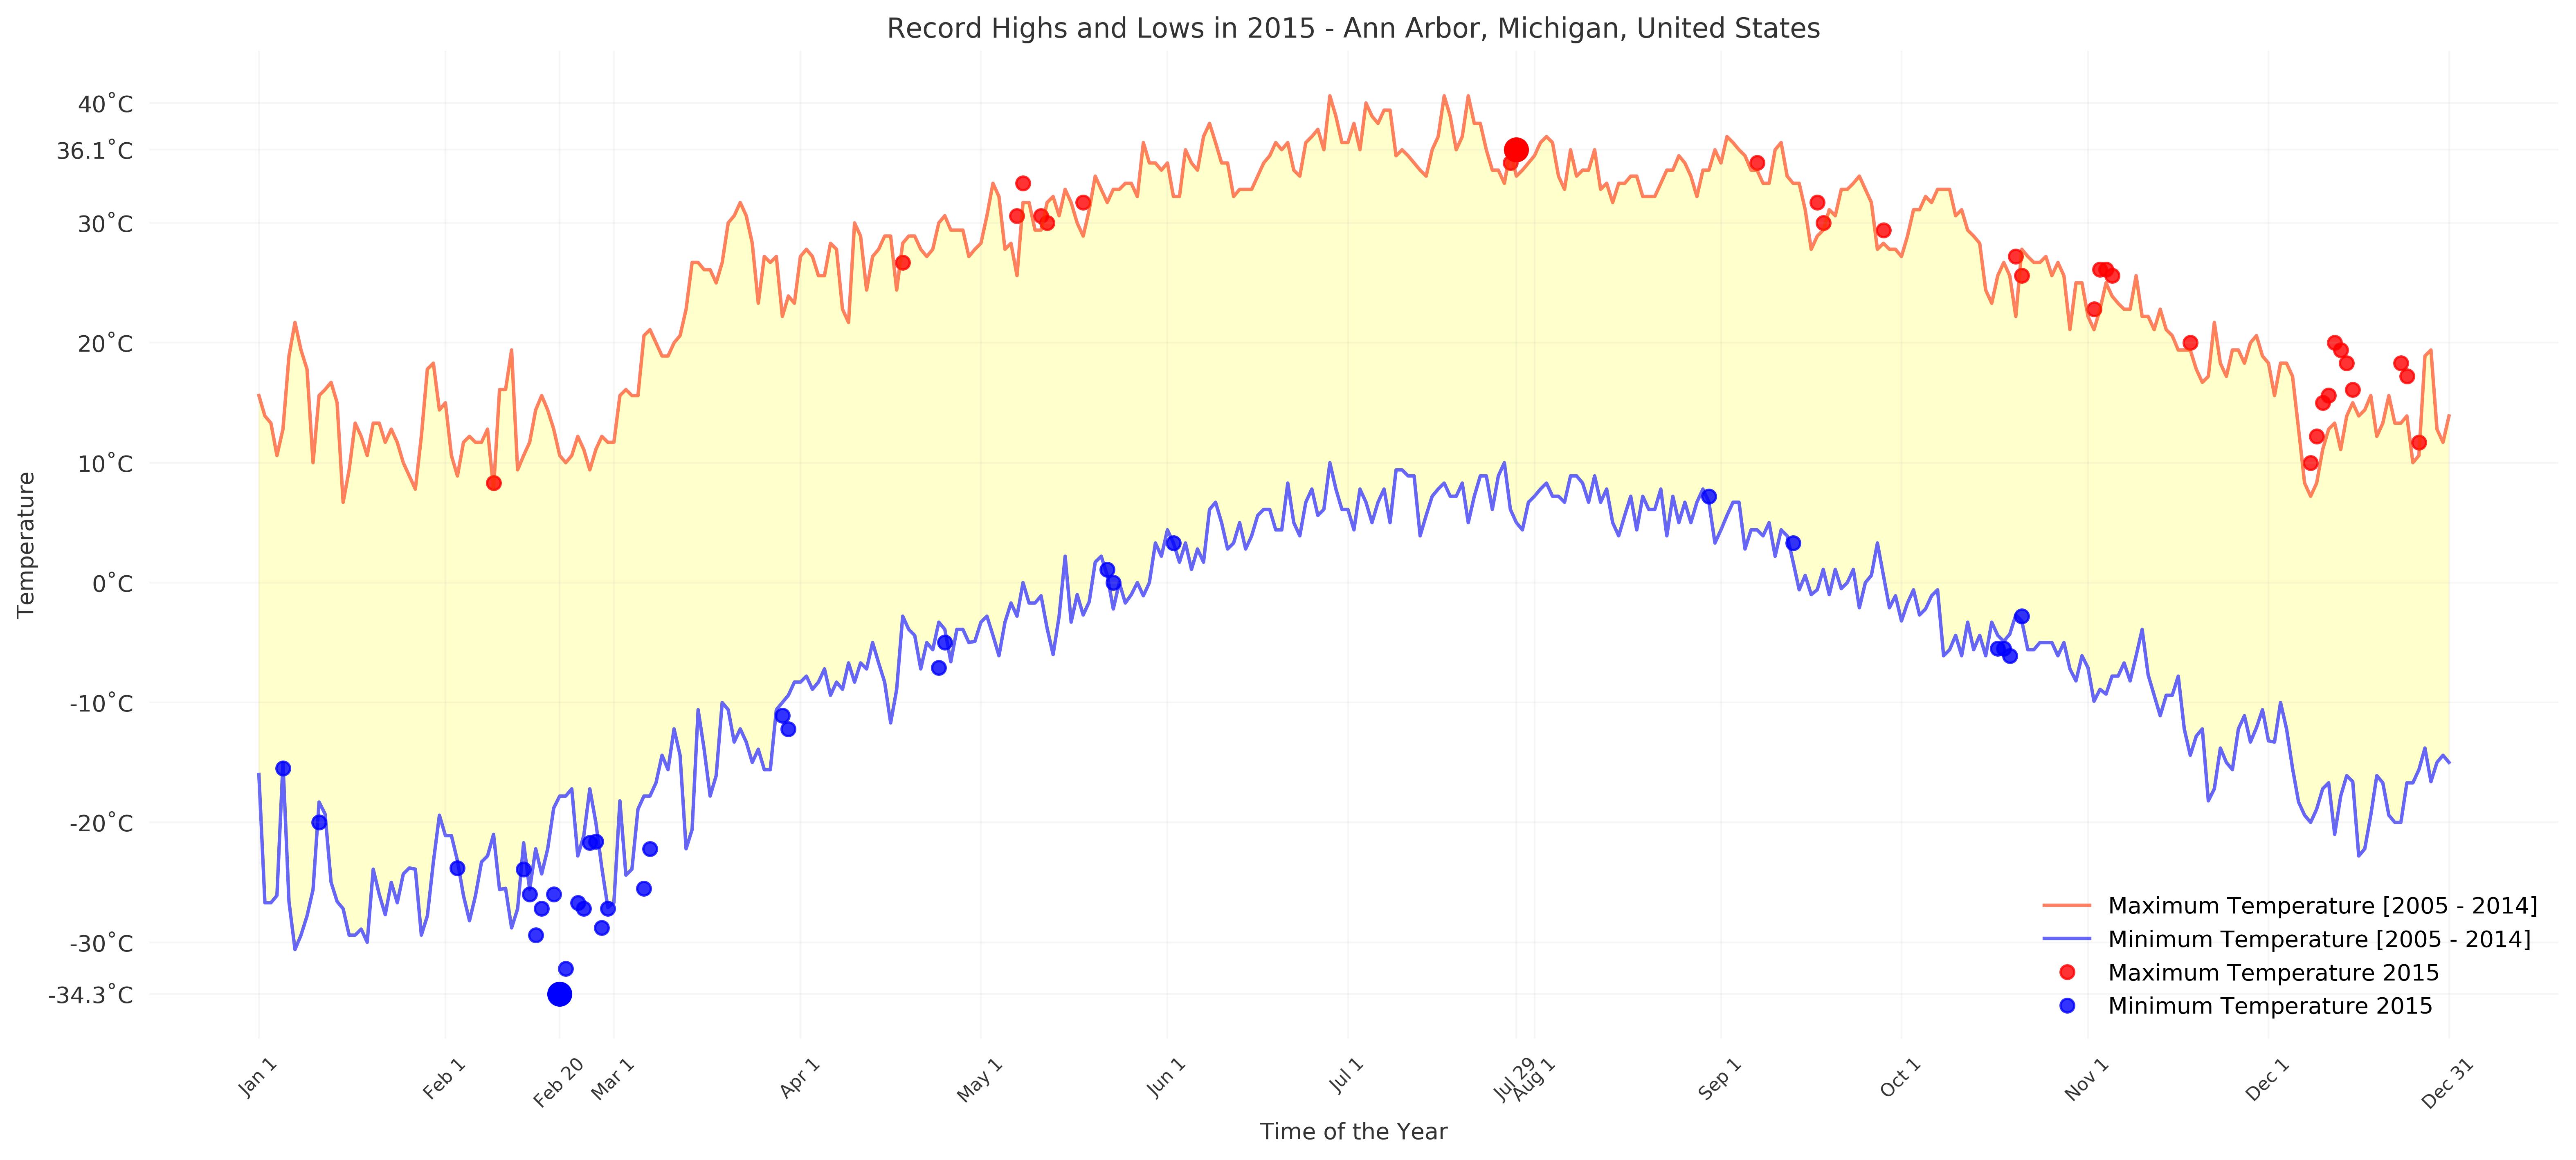

In [19]:
#plt.show()

In [18]:
plt.savefig("Record2.png")

In [811]:
df["y_max_2015"].argmax()

Timestamp('2015-07-29 00:00:00')

In [812]:
df["y_min_2015"].argmin()

Timestamp('2015-02-20 00:00:00')